# Hackathon Notebook

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # IMPORTING AND CLEANING NETFLIX TITLES DATASET #


In [6]:
# read and check csv dataset
df = pd.read_csv('netflix_titles.csv')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#Ensure that the 'date_added' column is in datetime format.
df['date_added'] = pd.to_datetime(df['date_added'])
# Ensure 'release_year' is in correct numeric form (- already int64)
# df.info()

In [10]:
#Extract month and year from 'date_added' for temporal analysis.
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  month_added   8797 non-null   float64       
 13  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [11]:
# report missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

In [12]:
#For numeric columns, decide how to fill in missing values (e.g. with the mean or median).
# df.fillna(df.mean(), inplace=True)
# Group decided against filling in missing data and instead recorded as missing

In [13]:
#For categorical columns 'rating', 'duration' and 'country', fill missing values with the mode or a placeholder like "Unknown", “Not Rated”
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Missing', inplace=True)
df['cast'].fillna('Missing', inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64

#### Standardize capitalization in categorical columns 'type' and 'rating' for consistency.

df['type'] = df['type'].str.title()
df['rating'] = df['rating'].str.title()

In [14]:
# Check for and remove any duplicate entries
df.drop_duplicates(inplace=True)

# END OF DATA CLEANING #

#############################
# EXPLORATORY DATA ANALYSIS #
#############################

In [15]:
# Create duplicate df
df2=df.copy()

########################################
# Trends and Insights in TV and Movies # - Hannah
########################################

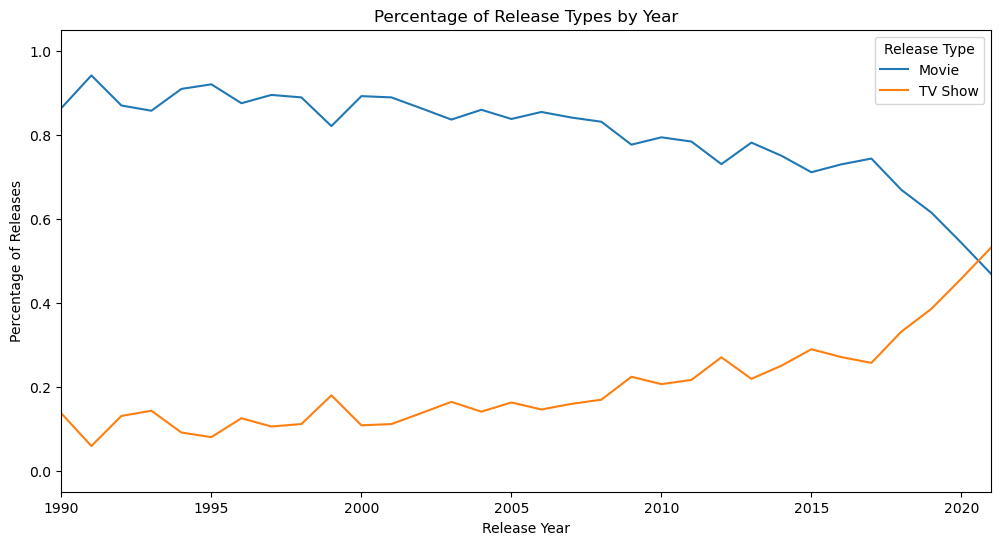

In [16]:
#PERCENTAGE RELEASE TYPES EACH YEAR- Hannah
df5 = df2[['release_year', 'type']].copy()

df5 = df5.groupby(['release_year', 'type']).size()
df5 = df5.unstack(fill_value=0)
df5 = df5.div(df5.sum(axis=1), axis=0)

df5.plot(kind='line', figsize=(12,6))

plt.title('Percentage of Release Types by Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Releases')
plt.xlim(1990,2021)

plt.legend(title='Release Type')
plt.show()


rating
TV-MA    2062
TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     139
TV-Y      131
TV-G      126
NR         75
dtype: int64


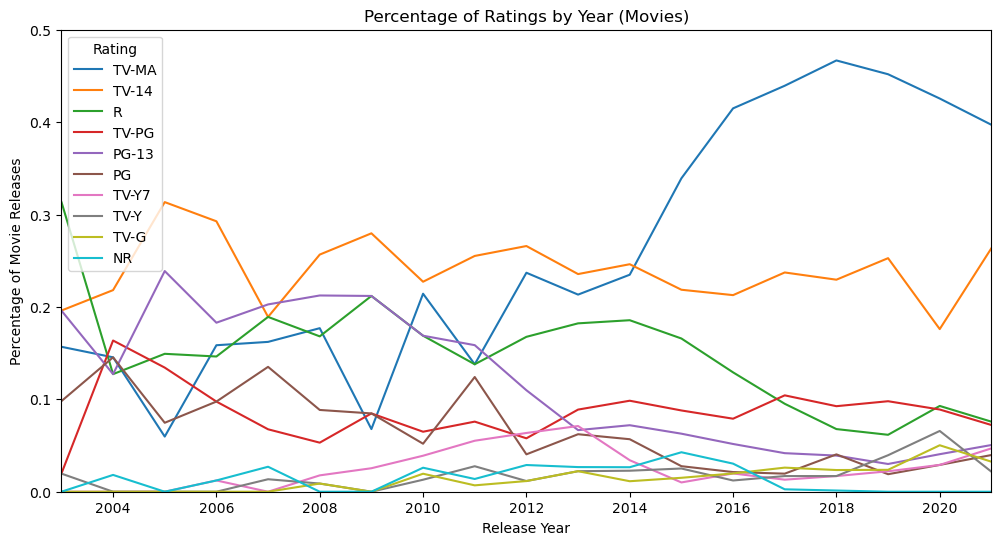

In [17]:
#PERCENTAGE OF MOVIES WITH EACH RATING PER YEAR- Hannah

df6 = df2[['release_year', 'rating']][df2.type == 'Movie'].copy()
df6 = df6[df6.rating != '66 Min']
df6 = df6[df6.rating != '74 Min']
df6 = df6[df6.rating != '84 Min'] #to remove entries with nonsensical ratings

print(df6.groupby('rating').size().sort_values(ascending=False).head(10)) #to find the most commonly used ratings

df6 = df6.groupby(['release_year', 'rating']).size()

df6 = df6.unstack(fill_value=0)
df6 = df6.div(df6.sum(axis=1), axis=0)
df6 = df6[['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'PG', 'TV-Y7', 'TV-Y', 'TV-G', 'NR']]

df6.plot(kind='line', figsize=(12,6))

plt.title('Percentage of Ratings by Year (Movies)')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Movie Releases')
plt.xlim(2003,2021)
plt.ylim(0, 0.5)

plt.legend(title='Rating')
plt.show()

rating
TV-MA        1145
TV-14         733
TV-PG         323
TV-Y7         195
TV-Y          176
TV-G           94
NR              5
Not Rated       2
R               2
TV-Y7-FV        1
dtype: int64


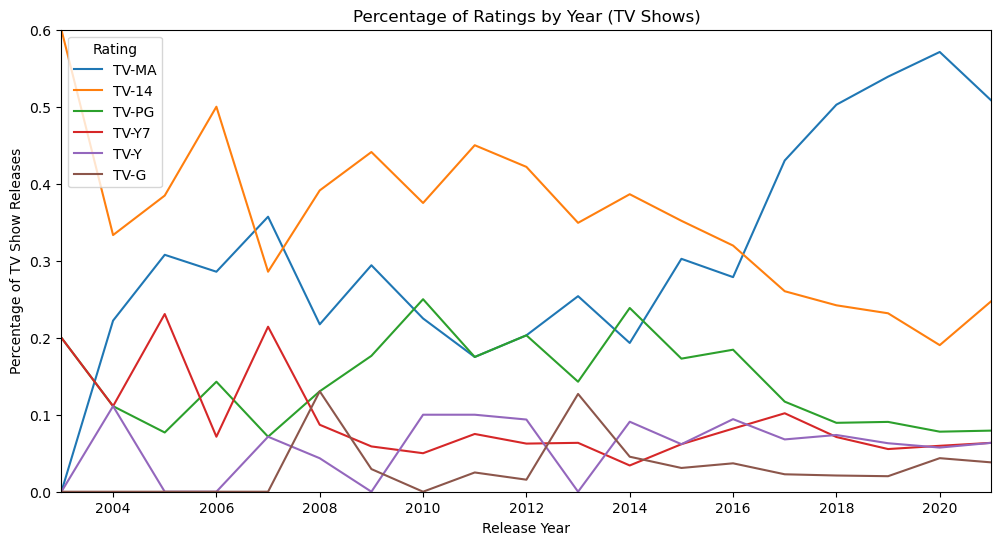

In [22]:
#PERCENTAGE OF TV SHOWS WITH EACH RATING PER YEAR- Hannah

df12 = df2[['release_year', 'rating']][df2.type == 'TV Show'].copy()
df12 = df12[df12.rating != '66 Min']
df12 = df12[df12.rating != '74 Min']
df12 = df12[df12.rating != '84 Min']#to remove entries with nonsensical ratings

print(df12.groupby('rating').size().sort_values(ascending=False).head(12)) #to find the most commonly used ratings

df12 = df12.groupby(['release_year', 'rating']).size()
df12 = df12.unstack(fill_value=0)
df12 = df12.div(df12.sum(axis=1), axis=0)
df12 = df12[['TV-MA', 'TV-14', 'TV-PG', 'TV-Y7', 'TV-Y', 'TV-G']]

df12.plot(kind='line', figsize=(12,6))

plt.title('Percentage of Ratings by Year (TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Percentage of TV Show Releases')
plt.xlim(2003,2021)
plt.ylim(0, 0.6)

plt.legend(title='Rating')
plt.show()

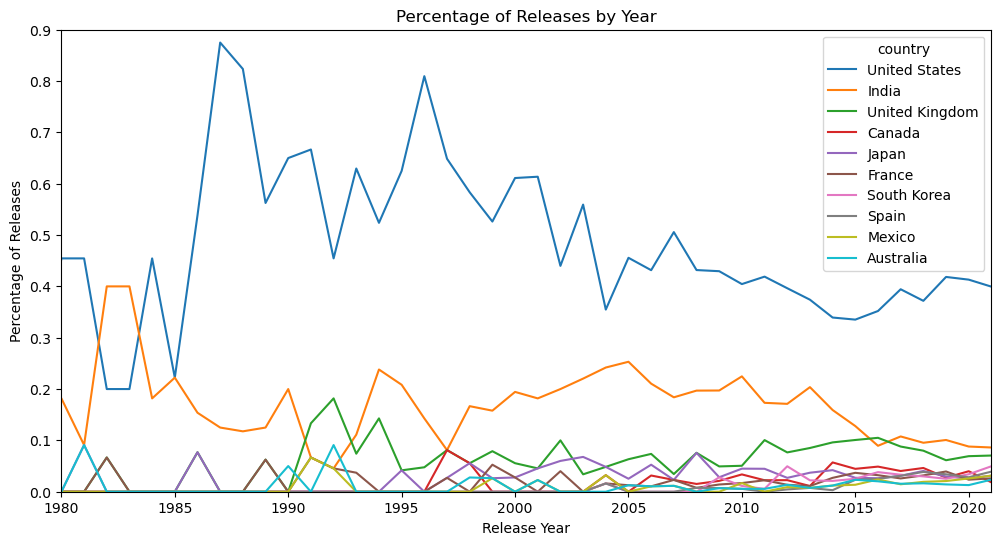

In [23]:
#PERCENTAGE OF RELEASES FROM EACH COUNTRY PER YEAR- Hannah

df9 = df2[df2.country!='Unknown'].copy()
df9['country'] = df9['country'].str.split(',').str[0]
df9 = df9.groupby('country').size().sort_values(ascending=False)


df8 = df2[['release_year', 'country']].copy()

df8['country'] = df8['country'].str.split(',').str[0]
df8 = df8[df8.country != 'Unknown']
df8 = df8.groupby(['release_year', 'country']).size()
df8 = df8.unstack(fill_value=0)
df8 = df8.div(df8.sum(axis=1), axis=0)
df8 = df8[['United States', 'India', 'United Kingdom', 'Canada', #'Unknown',
                                'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']]


df8.plot(kind='line', figsize=(12,6))

plt.title('Percentage of Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Releases')
plt.xlim(1980,2021)
plt.ylim(0, 0.9);



#####################################################
# Trends and Insights into Countries and Continents # - Shahana and Lauren M
#####################################################

In [24]:
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'France': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Australia': 'Australia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'India': 'Asia',
    'South Africa': 'Africa',
    'Belgium': 'Europe',
    'Czech Republic': 'Europe',
    'Greece': 'Europe',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Israel': 'Asia',
    'Lithuania': 'Europe',
    'Malaysia': 'Asia',
    'Netherlands': 'Europe',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Thailand': 'Asia',
    'Turkey': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'Colombia': 'South America',
    'Indonesia':'Asia',
    'Ireland':'Europe',
    'Nigeria':'Africa',
    'Ghana': 'Africa',
    'South Africa':'Africa',
    'Senegal':'Africa',
    'Namibia':'Africa',
    'Malawi':'Africa',
    'Lesotho':'Africa',
    'Zambia':'Africa',
    'Pakistan':'Asia',
    'United Arab Emirates':'Asia',
    'Jordan':'Asia',
    'United Arab Emirates, Jordan':'Asia',
    'Egypt':'Africa',
    'Australia': 'Australia',
    'New Zealand':'Australia'}

df2['Continent'] = df2['country'].map(country_to_continent)

In [25]:
df2.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description,Continent
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,6388
unique,8807,2,8807,4529,7693,749,18,221,514,8775,6
top,s1,Movie,Dick Johnson Is Dead,Missing,Missing,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",North America
freq,1,6131,1,2634,825,2818,3207,1793,362,4,3109


In [26]:
df2['year_added'].min()

2008.0

In [27]:
continent_counts = df2.groupby(['year_added', 'Continent']).size().unstack(fill_value=0)

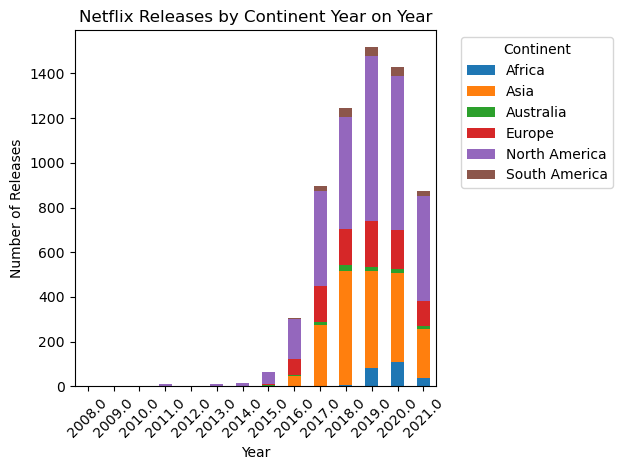

In [28]:
continent_counts.plot(kind='bar', stacked=True)
plt.title('Netflix Releases by Continent Year on Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [29]:
df_2019 = df2.copy()
df_2019 = df2[df2['year_added'] == 2019]


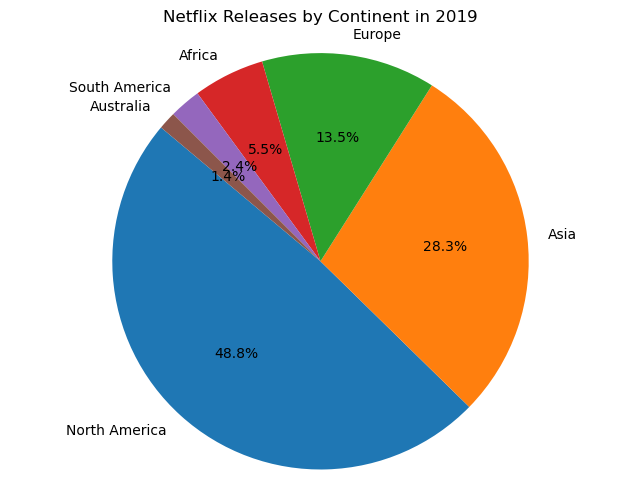

In [30]:
continent_counts = df_2019['Continent'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Netflix Releases by Continent in 2019')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


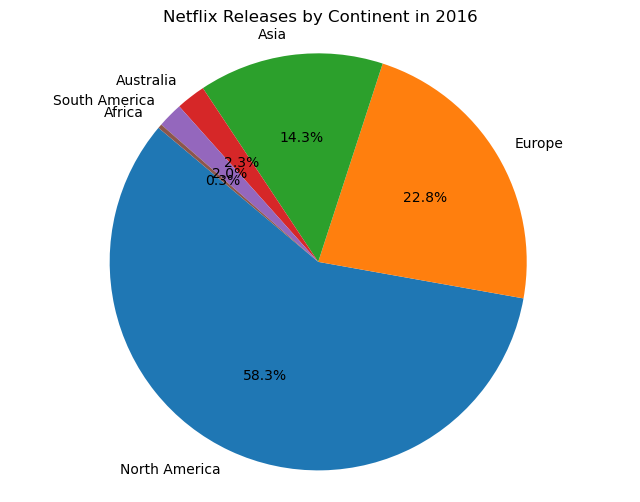

In [31]:
df_2016 = df2.copy()
df_2016 = df2[df2['year_added'] == 2016]



continent_counts_2016 = df_2016['Continent'].value_counts()



plt.figure(figsize=(8, 6))
plt.pie(continent_counts_2016, labels=continent_counts_2016.index, autopct='%1.1f%%', startangle=140)
plt.title('Netflix Releases by Continent in 2016')
plt.axis('equal')
plt.show()


#######################################
# Trends and Insights Genres and cast # - Chloe
#######################################

In [32]:
##### Primary Genres in years pre 2018 and post 2017
# Add primary_genre and primary_cast and year_group columns to copy of df2
df2_1=df2.copy()
df2_1['primary_genre'] = df2_1['listed_in'].str.split(', ').str[0]
df2_1['primary_genre_exc_int'] = np.where(df2_1['primary_genre'].str.contains('International'),df2['listed_in'].str.split(', ').str[1],df2['listed_in'].str.split(', ').str[0])
df2_1['primary_cast'] = df2_1['cast'].str.split(', ').str[0]
df2_1['year_group'] = np.where(df2_1['year_added']>2017, 'post2017', 'pre2018')

# Subset of df2 where primary_cast is not Missing
primary_cast = df2_1[df2_1['primary_cast']!='Missing']


In [33]:
# split df2_1 into grouped years - pre2018 and post2017

pre2018 = df2_1[df2_1['year_added']<2018]
post2017 = df2_1[df2_1['year_added']>2017]

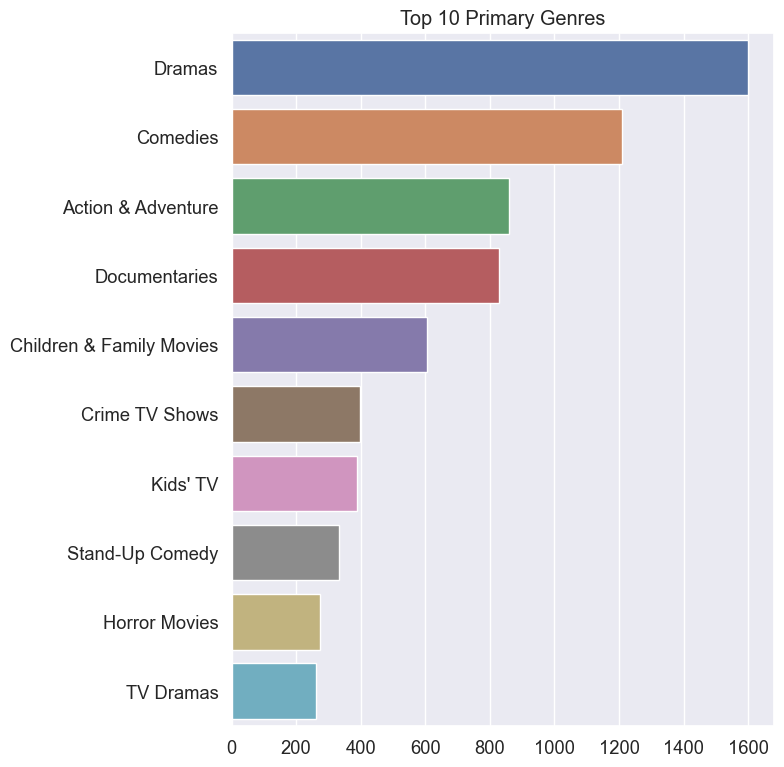

In [34]:
# Top 10 Primary Genres in all years - excluding International
sns.set(font_scale=1.2)
plt.figure(figsize=(7,9))
sns.countplot(y = df2_1['primary_genre_exc_int'], order=df2_1['primary_genre_exc_int'].value_counts().index[:10])
plt.title('Top 10 Primary Genres')
plt.xlabel('')
plt.ylabel('');

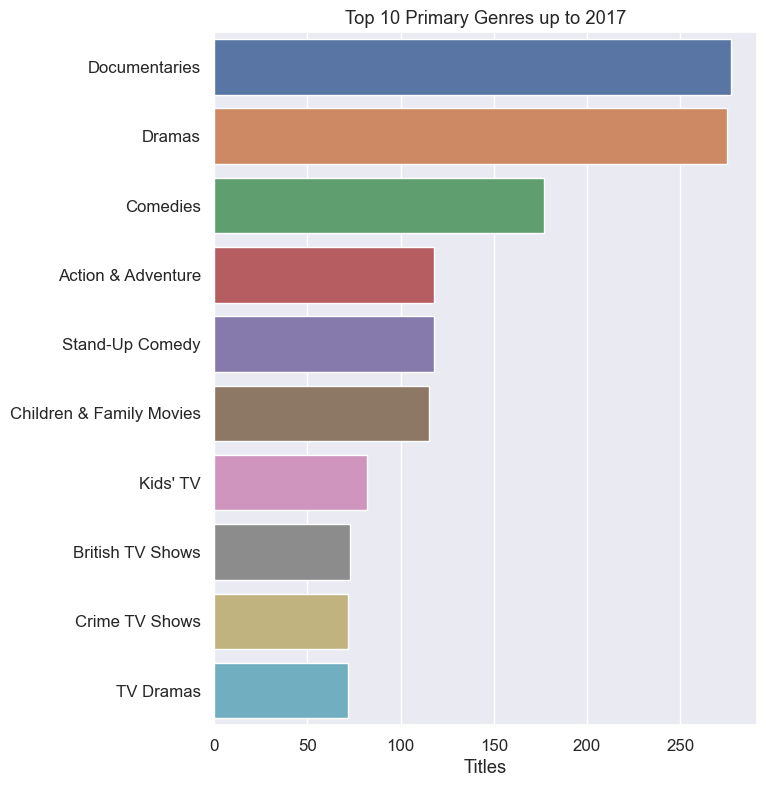

In [35]:
# Top 10 Primary Genres in years pre 2018 - excluding international
sns.set(font_scale=1.1)
plt.figure(figsize=(7,9))
sns.countplot(y = pre2018['primary_genre_exc_int'], order=pre2018['primary_genre_exc_int'].value_counts().index[:10])
plt.title('Top 10 Primary Genres up to 2017')
plt.xlabel('Titles')
plt.ylabel('');

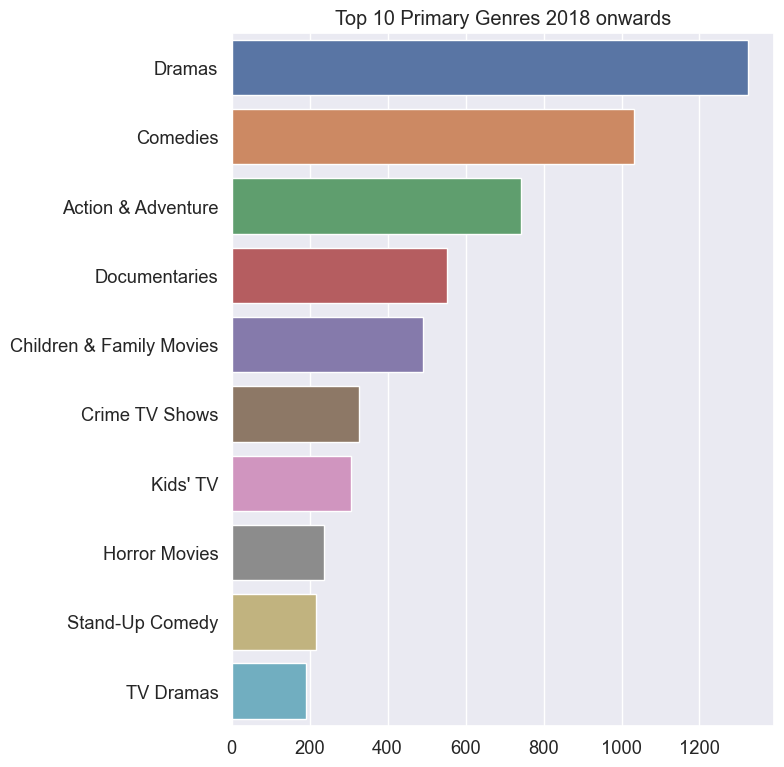

In [36]:
# Top 10 Primary Genres in years post 2017 - excluding international
sns.set(font_scale=1.2)
plt.figure(figsize=(7,9))
sns.countplot(y = post2017['primary_genre_exc_int'], order=post2017['primary_genre_exc_int'].value_counts().index[:10])
plt.title('Top 10 Primary Genres 2018 onwards')
plt.xlabel('')
plt.ylabel('');

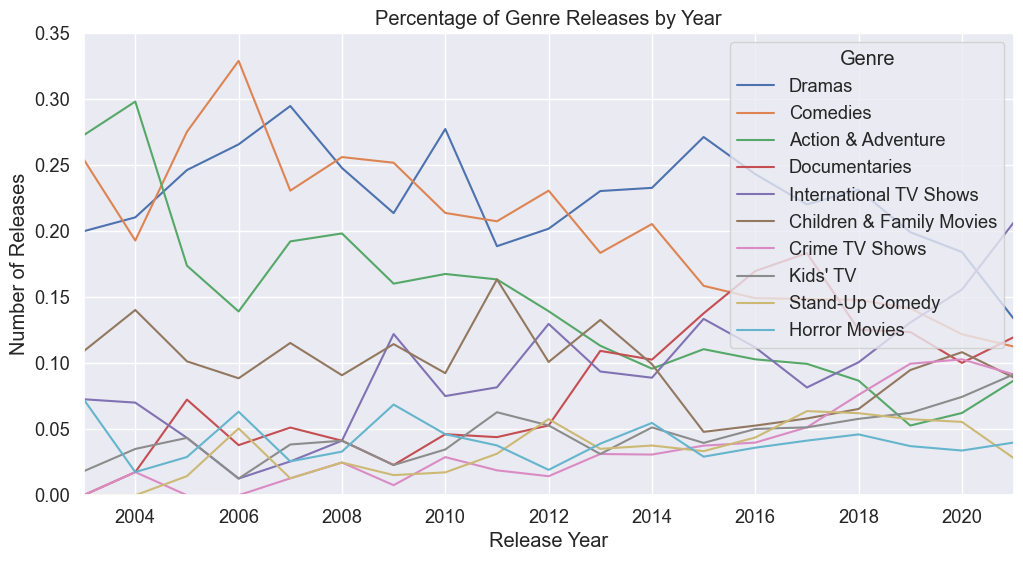

In [37]:
#PERCENTAGE OF RELEASES OF EACH GENRE PER YEAR - Hannah

df3 = df2[['release_year', 'listed_in']].copy()


df3['listed_in'] = df3['listed_in'].str.split(',').str[0]
#print(df3.groupby('listed_in').size().sort_values(ascending=False))
df3 = df3.groupby(['release_year', 'listed_in']).size()
df3 = df3.unstack(fill_value=0)
df3 = df3[['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'International TV Shows',
           'Children & Family Movies', 'Crime TV Shows', "Kids' TV", 'Stand-Up Comedy', 'Horror Movies']]

df4 = df3.div(df3.sum(axis=1), axis=0)
df4 = df4[['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'International TV Shows',
           'Children & Family Movies', 'Crime TV Shows', "Kids' TV", 'Stand-Up Comedy', 'Horror Movies']]
            #, 'British TV Shows', 'Docuseries', 'Anime Series', 'International Movies', 'Reality TV', 'TV Comedies']]

df4.plot(kind='line', figsize=(12,6))

plt.title('Percentage of Genre Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xlim(2003,2021)
plt.ylim(0, 0.35)
plt.legend(title='Genre')
plt.show()


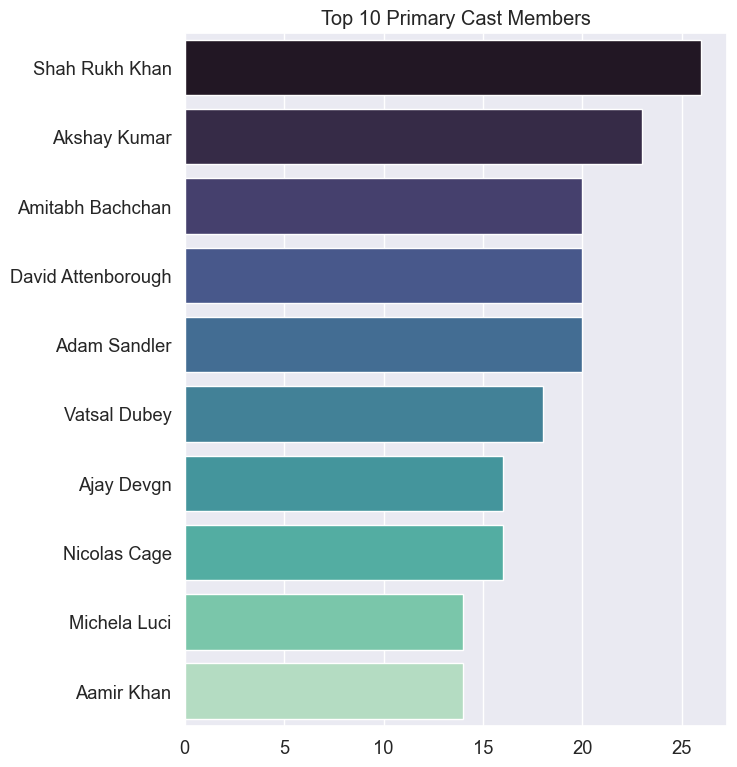

In [38]:
# Plot primary cast all years - Chloe
sns.set(font_scale=1.2)
plt.figure(figsize=(7,9))
sns.countplot(y = primary_cast['primary_cast'], palette='mako', order=primary_cast['primary_cast'].value_counts().index[:10])
plt.title('Top 10 Primary Cast Members')
plt.xlabel('')
plt.ylabel('');

In [39]:
# Create subsets of primary_cast, pre2018, post 2017
primary_cast_pre2018 = primary_cast[primary_cast['year_group']=='pre2018']
primary_cast_post2017 = primary_cast[primary_cast['year_group']=='post2017']


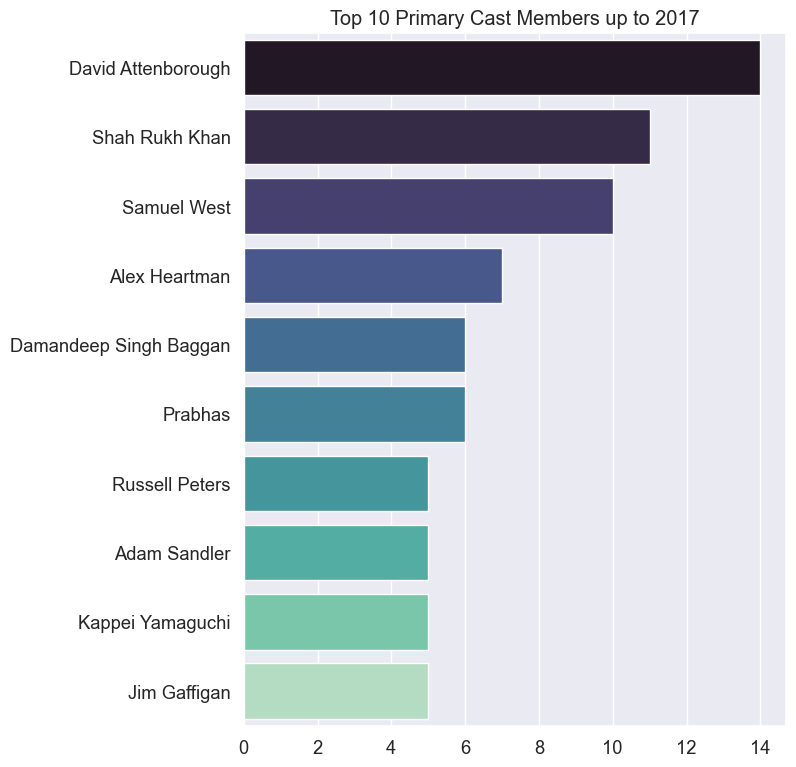

In [40]:
# Plot primary_cast pre 2018
sns.set(font_scale=1.2)
plt.figure(figsize=(7,9))
sns.countplot(y = primary_cast_pre2018['primary_cast'], palette='mako', order=primary_cast_pre2018['primary_cast'].value_counts().index[:10])
plt.title('Top 10 Primary Cast Members up to 2017')
plt.xlabel('')
plt.ylabel('');

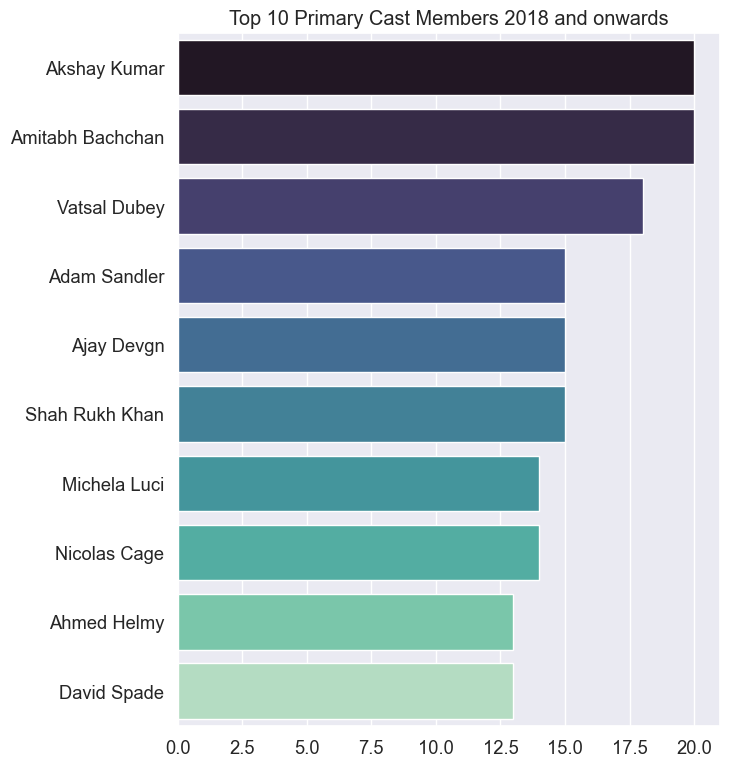

In [41]:
# Plot primary_cast post 2017
sns.set(font_scale=1.2)
plt.figure(figsize=(7,9))
sns.countplot(y = primary_cast_post2017['primary_cast'], palette='mako', order=primary_cast_post2017['primary_cast'].value_counts().index[:10])
plt.title('Top 10 Primary Cast Members 2018 and onwards')
plt.xlabel('')
plt.ylabel('');

#####################################################
# Insights into the timing of content release # Eve #
#####################################################

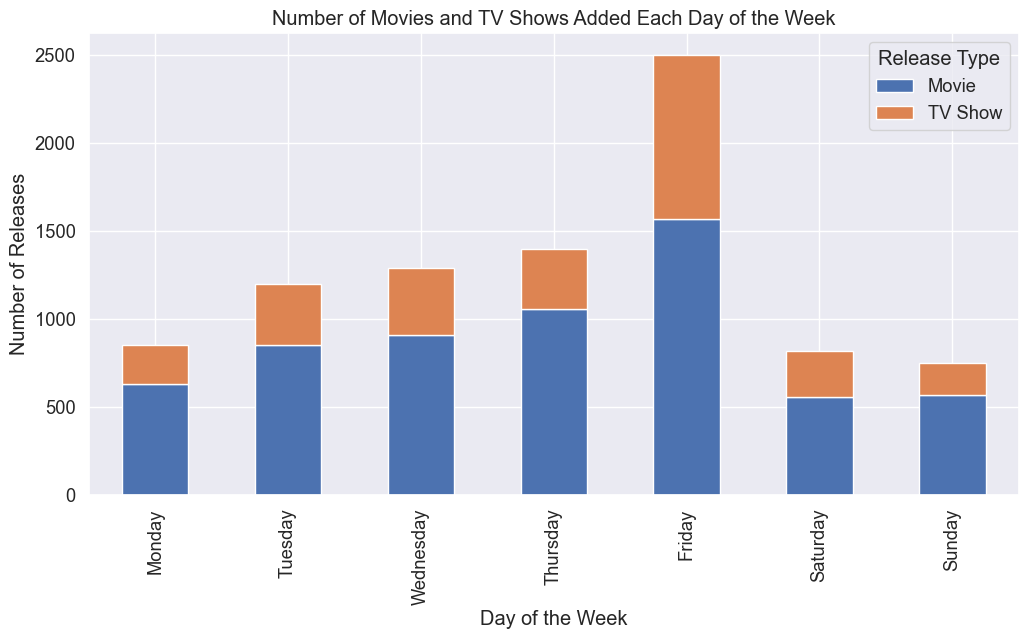

In [42]:
#Number of movies/tv shows added each day of the week -Eve

df2['date_added'] = pd.to_datetime(df2['date_added'])

df2['day_of_week'] = df2['date_added'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

grouped_data = df2.groupby(['day_of_week', 'type']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(day_order)
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Movies and TV Shows Added Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')

plt.legend(title='Release Type')
plt.show()

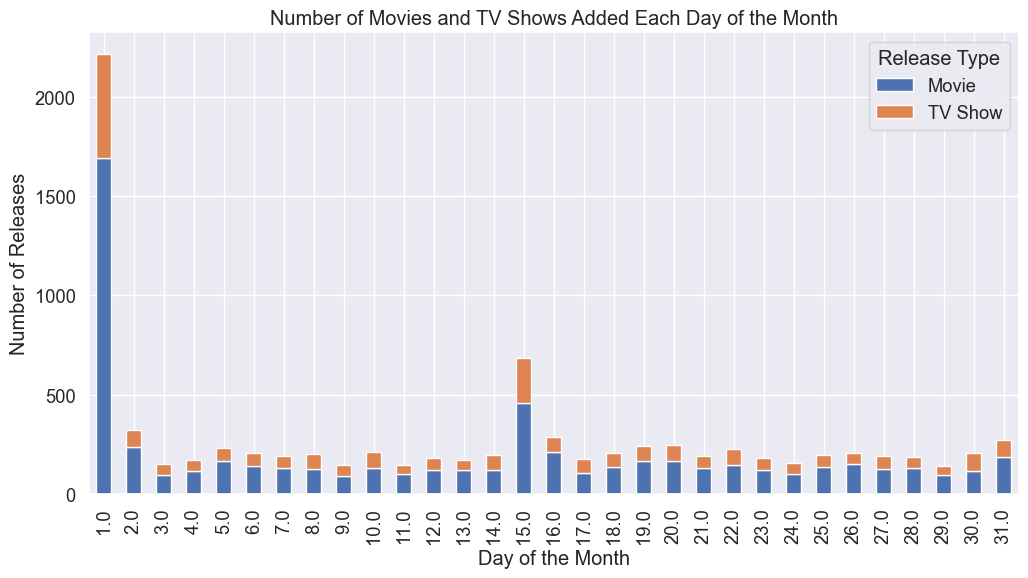

In [43]:
#Number of movies/tv shows added each day of the month - Eve

df2['date_added'] = pd.to_datetime(df2['date_added'])

df2['day_of_month'] = df2['date_added'].dt.day

grouped_data = df2.groupby(['day_of_month', 'type']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Movies and TV Shows Added Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Releases')

plt.legend(title='Release Type')
plt.show()


# END OF CODE